# Exercise 11: Understanding the Foundational Concepts of Statistics

1. Import the pandas, numpy, and matplotlib packages for use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Load the dataset and preview the first five lines of data:

In [2]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. We only require the Sepal Length and Sepal Width features, so remove the other columns

In [3]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


4. Visualize the dataset by plotting the Sepal Length versus Sepal Width values

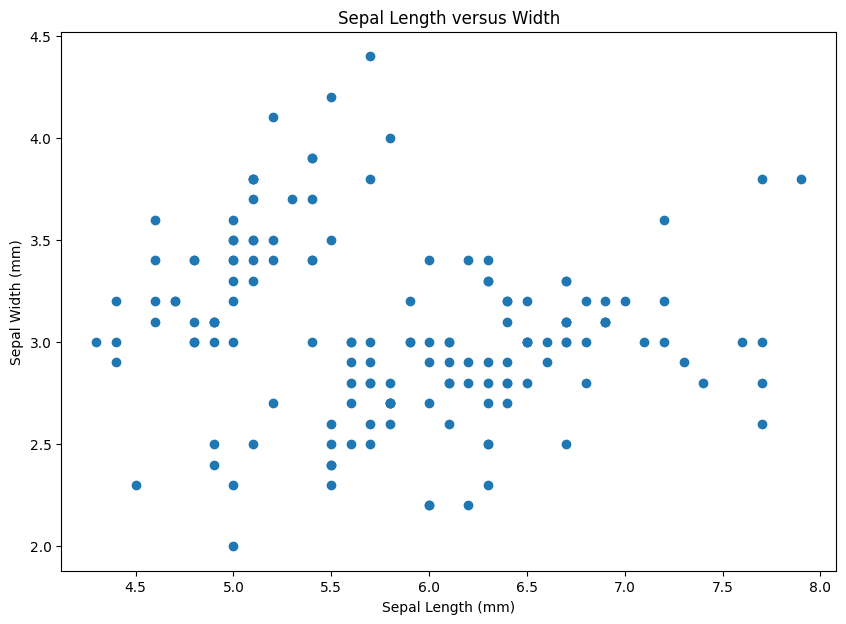

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Sepal Length'], df['Sepal Width']);
plt.xlabel('Sepal Length (mm)');
plt.ylabel('Sepal Width (mm)');
plt.title('Sepal Length versus Width');

5. Compute the mean value using the pandas method

In [5]:
df.mean()

Sepal Length    5.843333
Sepal Width     3.054000
dtype: float64

6. Compute the mean value using the numpy method

In [6]:
np.mean(df.values, axis=0)

array([5.84333333, 3.054     ])

7. Compute the standard deviation value using the pandas method

In [7]:
df.std()

Sepal Length    0.828066
Sepal Width     0.433594
dtype: float64

8. Compute the standard deviation value using the numpy method

In [8]:
np.std(df.values, axis=0)

array([0.82530129, 0.43214658])

9. Compute the variance values using the pandas method

In [9]:
df.var()

Sepal Length    0.685694
Sepal Width     0.188004
dtype: float64

10. Compute the variance values using the numpy method

In [10]:
np.var(df.values, axis=0)

array([0.68112222, 0.18675067])

11. Compute the covariance matrix using the pandas method

In [11]:
df.cov()

,Sepal Length,Sepal Width
Sepal Length,0.685694,-0.039268
Sepal Width,-0.039268,0.188004


12. Compute the covariance matrix using the numpy method

In [12]:
np.cov(df.values.T)

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

# Exercise 12: Computing Eigenvalues and Eigenvectors

1. Import the pandas and numpy packages

In [13]:
import pandas as pd
import numpy as np

2. Load the dataset

In [14]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. Again, we only require the Sepal Length and Sepal Width features, so remove the other columns

In [15]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


4. From NumPy's linear algebra module, use the single value decomposition function to compute the eigenvalues and eigenvectors:

In [16]:
eigenvectors, eigenvalues, _ = np.linalg.svd(df.values, full_matrices=False)

5. Look at the eigenvalues; we can see that the first value is the largest, so the first eigenvector contributes the most information:

In [17]:
eigenvalues

array([81.25483015,  6.96796793])

6. It is handy to look at eigenvalues as a percentage of the total variance within the dataset. Use a cumulative sum function to do this:

In [18]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues

array([81.25483015, 88.22279808])

7. Divide by the last or maximum value to convert to a percentage:

In [19]:
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.92101851, 1.        ])

8. Now, look at the eigenvectors

In [20]:
eigenvectors[0:5]

array([[-0.07553027, -0.11068158],
       [-0.07052087, -0.06007995],
       [-0.06946245, -0.09874988],
       [-0.06780439, -0.09257869],
       [-0.07500106, -0.13001654]])

9. Confirm that the shape of the eigenvector matrix is in the for # Samples x # Features; that is, 150 x 2

In [21]:
eigenvectors.shape

(150, 2)

10. Look at the values for the first eigenvector

In [22]:
P = eigenvectors[0]
P

array([-0.07553027, -0.11068158])

# Exercise 13: Manually Executing PCA

1. Import the pandas and numpy packages:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Load the dataset

In [24]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. Again, we only require the Sepal Length and Sepal Width features, so remove the other columns. In this example, we are not normalizing the selected dataset

In [25]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


4. Compute the covariance matrix for the selected data. Note that we need to take the transpose of the covariance matrix to ensure that it is based on the number of features (2) and not samples (150)

In [26]:
data = np.cov(df.values.T)
# The transpose is required to ensure the covariance matrix is 
#based on features, not samples data
data

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

5. Compute the eigenvectors and eigenvalues for the covariance matrix, Again, use the full_matrices function argument

In [27]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

6. What are the eigenvalues? These are returned sorted from the highest to lowest value

In [28]:
eigenvalues

array([0.6887728 , 0.18492474])

7. What are the corresponding eigenvectors?

In [29]:
eigenvectors

array([[-0.99693955,  0.07817635],
       [ 0.07817635,  0.99693955]])

8. Compute the eigenvalues as a percentage of the variance within the dataset

In [30]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.78834238, 1.        ])

9. As per the introduction to the exercise, we need to describe the data with at least 75% of the available variance. As per Step , the principal component comprises 78% of the available variance. As such, we require only the principal component from the dataset. What are the principal components?

In [31]:
P = eigenvectors[0]
P

array([-0.99693955,  0.07817635])

10. Without taking the transpose of the df.values matrix, multiplication could not occur

In [32]:
x_t_p = P.dot(df.values.T)
x_t_p

array([-4.81077444, -4.65047471, -4.43545153, -4.34357521, -4.70326285,
       -5.07858577, -4.32012231, -4.71889812, -4.15982257, -4.64265708,
       -5.09422104, -4.51951021, -4.55078076, -4.05231098, -5.46954395,
       -5.33857945, -5.07858577, -4.81077444, -5.38548526, -4.78732154,
       -5.11767394, -4.79513917, -4.30448703, -4.82640971, -4.51951021,
       -4.75016867, -4.71889812, -4.9104684 , -4.91828603, -4.43545153,
       -4.54296312, -5.11767394, -4.86356259, -5.15482681, -4.64265708,
       -4.73453339, -5.20955026, -4.64265708, -4.15200494, -4.81859208,
       -4.71108049, -4.30642234, -4.13636967, -4.71108049, -4.78732154,
       -4.55078076, -4.78732154, -4.33575758, -4.99452708, -4.72671576,
       -6.72841249, -6.13024876, -6.63653617, -5.30336189, -6.26121325,
       -5.46366162, -6.02273717, -4.69738052, -6.35308957, -4.97300948,
       -4.82834502, -5.64741426, -5.80964929, -5.8546198 , -5.35615003,
       -6.43714826, -5.34833239, -5.57117321, -6.0090372 , -5.38

11. Plot the values of the principal component

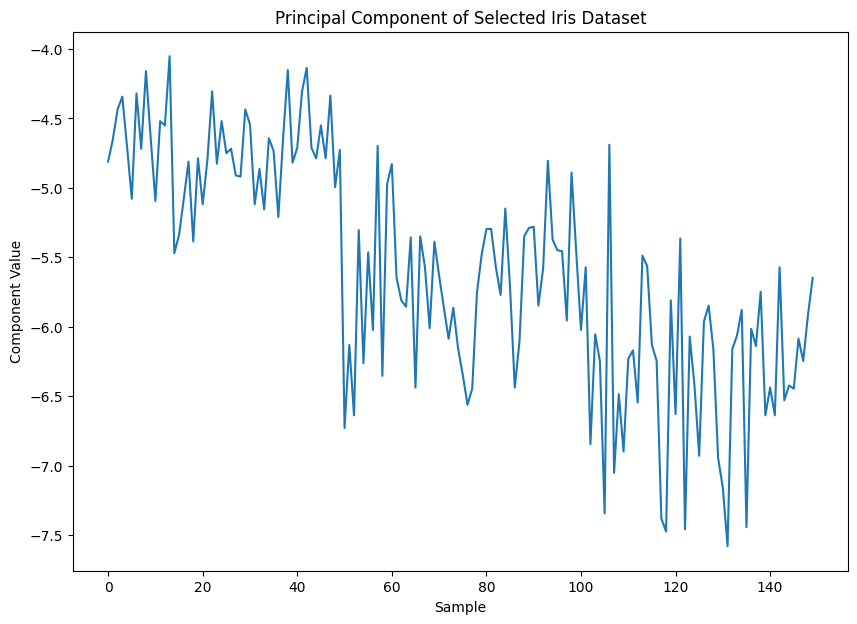

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(x_t_p);
plt.title('Principal Component of Selected Iris Dataset');
plt.xlabel('Sample');
plt.ylabel('Component Value');

# Exercise 14: Scikit-Learn PCA

1. Import the pandas, numpy, and PCA modules from the sklearn packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2. Load the dataset

In [35]:
df = pd.read_csv('iris-data.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


3. Again, we only require the Sepal Length and Sepal Width features, so remove the other columns. In this example, we are not normalizing the selected dataset

In [36]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


4. Fit the data to a scikit-learn PCA model of the covariance data. Using the default values, as we have here, produces the maximum number of eigenvalues and eigenvectors possible for the dataset

In [37]:
model = PCA()
model.fit(df.values)

PCA()

5. The percentage of variance described by the components (eigenvalues) is contained within the explained_variance_ratio_ property. Display the values for explained_variance_ratio_

In [38]:
model.explained_variance_ratio_

array([0.78834238, 0.21165762])

6. Display the eigenvectors via the components_ property

In [39]:
model.components_

array([[ 0.99693955, -0.07817635],
       [ 0.07817635,  0.99693955]])

7. In this exercise, we will again only use the primary component, so we will create a new PCA model, this time specifying the number of components (eigenvectors/eigenvalues) to be 1

In [40]:
model = PCA(n_components=1)

8. Use the fit method to fit the covariance matrix to the PCA model and generate the corresponding eigenvalues/eigenvectors

In [41]:
model.fit(df.values)

PCA(n_components=1)

9. Display the eigenvectors using the components_ property

In [42]:
model.components_

array([[ 0.99693955, -0.07817635]])

10. Transform the Iris dataset into the lower space by using the fit_transform method of the model on the dataset. Assign the transformed values to the data_t variable

In [43]:
data_t = model.fit_transform(df.values)

11. Plot the transformed values to visualize the result

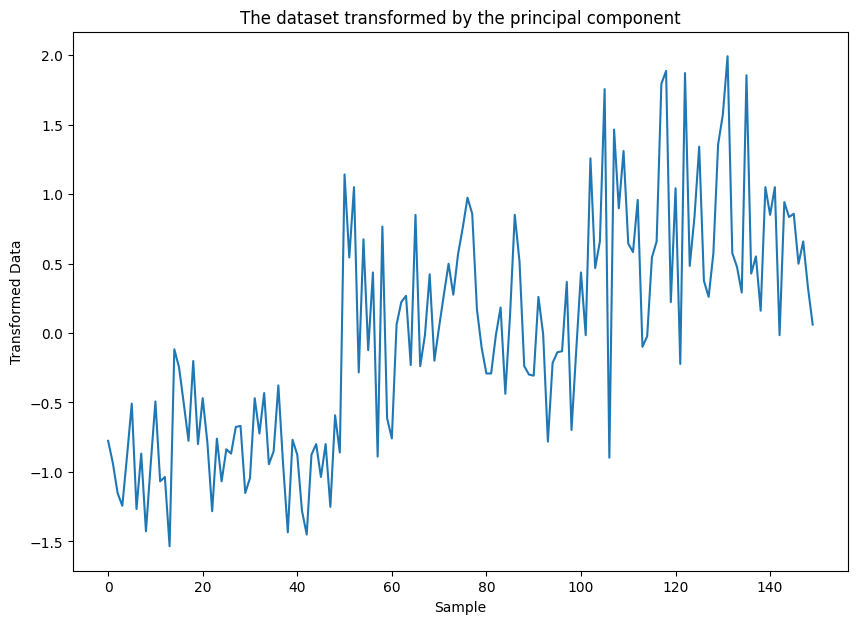

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(data_t);
plt.xlabel('Sample');
plt.ylabel('Transformed Data');
plt.title('The dataset transformed by the principal component');

# Activity 6: Manual PCA versus scikit-learn

1. Import the pandas, numpy, and matplotlib plotting libraries and the scikit-learn PCA model

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2. Load the dataset and select only the sepal features as per the previous exercises. Display the first five rows of the data

In [46]:
df = pd.read_csv('iris-data.csv')
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


3. Compute the covariance matrix for the data

In [47]:
cov = np.cov(df.values.T)
cov

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

4. Transform the data using the scikit-learn API and only the first principal component. Store the transformed data in the sklearn_pca variable.

In [48]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

5. Transform the data using the manual PCA and only the first principal component. Store the transformed data in the manual_pca variable.

In [49]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

6. Plot the sklearn_pca and manual_pca values on the same plot to visualize the difference.

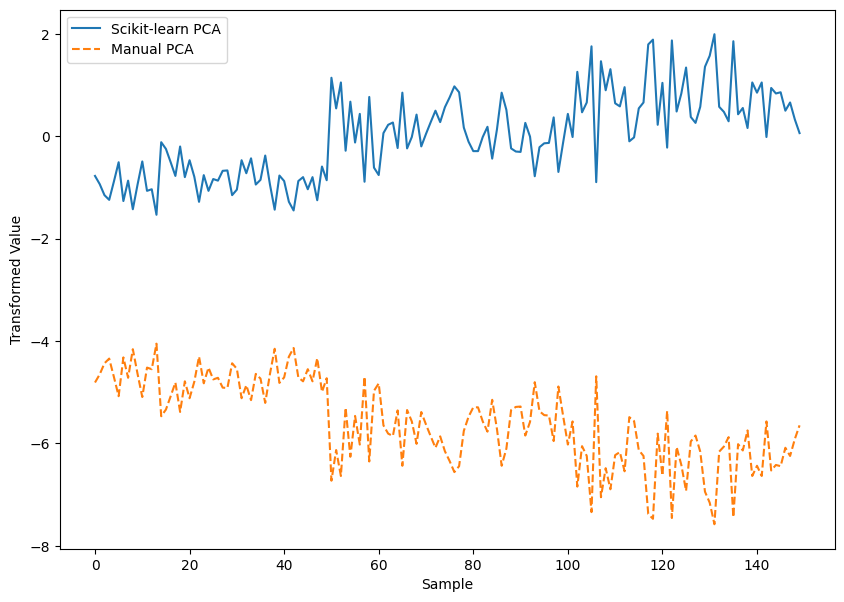

In [50]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

7. Notice that the two plots look almost identical, but with some key differences. What are these differences?

In [51]:
model.components_

array([[ 0.99693955, -0.07817635]])

In [52]:
P

array([-0.99693955,  0.07817635])

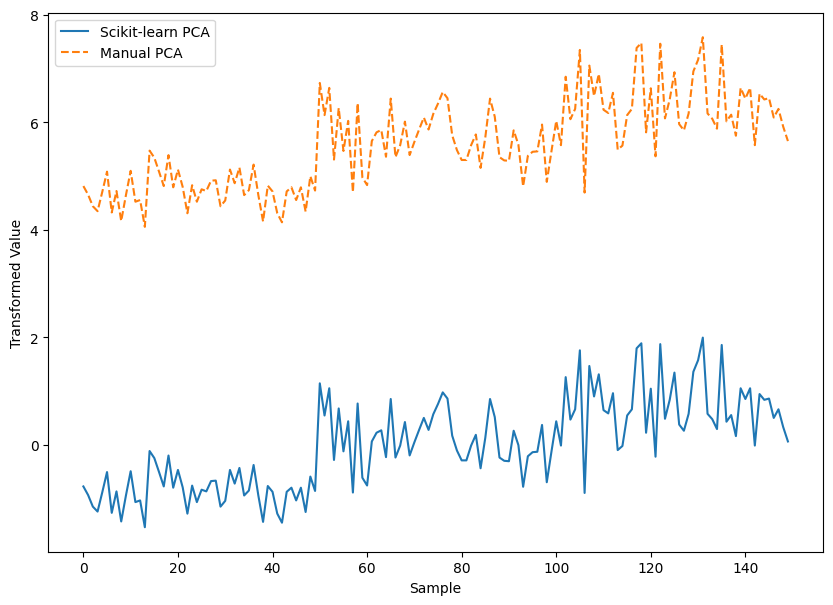

In [53]:
manual_pca *= -1
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

8. See whether you can modify the output of the manual PCA process to bring it in line with the scikit-learn version.

In [54]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [55]:
manual_pca *= -1

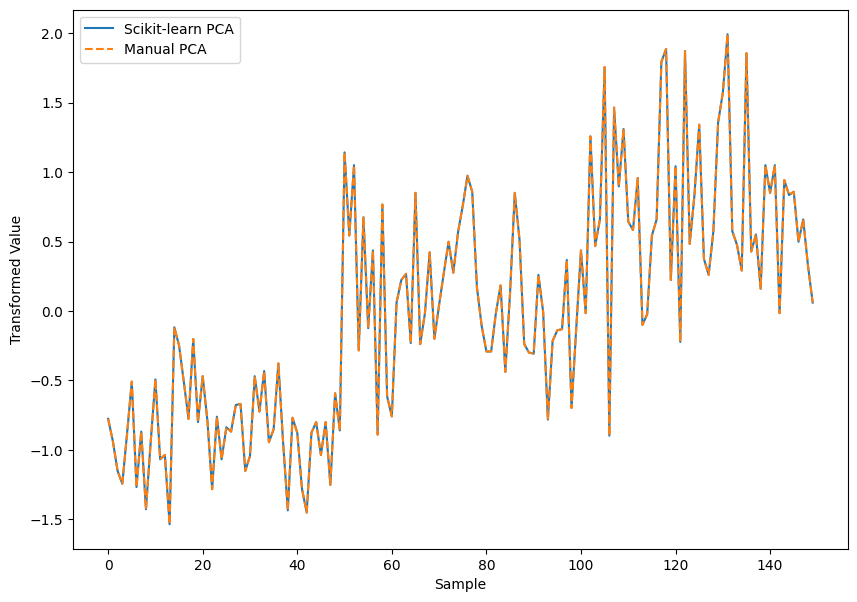

In [56]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

# Exercise 15: Visualizing Variance Reduction with Manual PCA

1. Import the pandas, numpy, and matplotlib plotting libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Read in the Sepal features from the Iris dataset

In [58]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


3. Centre the dataset around zero by subtracting the respective means

In [59]:
means = np.mean(df.values, axis=0)
means

array([5.84333333, 3.054     ])

In [60]:
data = df.values - means
data[0:5]

array([[-0.74333333,  0.446     ],
       [-0.94333333, -0.054     ],
       [-1.14333333,  0.146     ],
       [-1.24333333,  0.046     ],
       [-0.84333333,  0.546     ]])

4. Use manual PCA to transform the data on the basis of the first principal component

In [61]:
eigenvectors, eigenvalues, _ = np.linalg.svd(np.cov(data.T), full_matrices=False)
P = eigenvectors[0]
P

array([-0.99693955,  0.07817635])

5. Transform the data into the lower-dimensional space

In [62]:
data_transformed = P.dot(data.T)

6. Reshape the principal components for later use

In [63]:
P = P.reshape((-1, 1))

7. To compute the inverse transform of the reduced dataset, we need to restore the selected eigenvectors into the higher-dimensional space. To do this, we will invert the matrix.

In [64]:
P_transformed = np.linalg.pinv(P)
P_transformed

array([[-0.99693955,  0.07817635]])

8. Prepare the transformed data for use in the matrix multiplication

In [65]:
data_transformed = data_transformed.reshape((-1, 1))

9. Compute the inverse transform of the reduced data and plot the result to visualize the effect of removing the variance from the data

In [66]:
data_restored = data_transformed.dot(P_transformed)
data_restored[0:5]

array([[-0.77355037,  0.06065899],
       [-0.93335951,  0.07319064],
       [-1.14772462,  0.09000037],
       [-1.23931976,  0.09718292],
       [-0.88073292,  0.06906386]])

10. Add the means back to the transformed data

In [67]:
data_restored += means

11. Add the means back to the transformed data

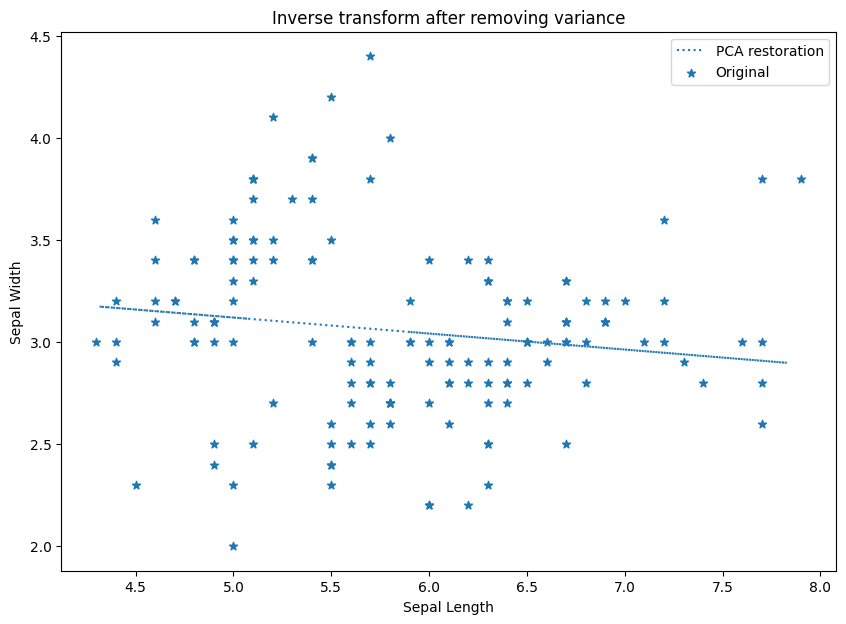

In [68]:
plt.figure(figsize=(10, 7))
plt.plot(data_restored[:,0], data_restored[:,1], linestyle=':', label='PCA restoration');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='*', label='Original');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');

12. There are only two components of variation in this dataset. If we do not remove any of the components, what will be the result of the inverse transform? Again, transform the data into the lower-dimensional space, but this time, use all of the eigenvectors.

In [69]:
P = eigenvectors
data_transformed = P.dot(data.T)

13. Transpose data_transformed to put it into the correct shape for matrix multiplication

In [70]:
data_transformed = data_transformed.T

14. Now, restore the data back to the higher-dimensional space.

In [71]:
data_restored = data_transformed.dot(P)
data_restored

array([[-0.74333333,  0.446     ],
       [-0.94333333, -0.054     ],
       [-1.14333333,  0.146     ],
       [-1.24333333,  0.046     ],
       [-0.84333333,  0.546     ],
       [-0.44333333,  0.846     ],
       [-1.24333333,  0.346     ],
       [-0.84333333,  0.346     ],
       [-1.44333333, -0.154     ],
       [-0.94333333,  0.046     ],
       [-0.44333333,  0.646     ],
       [-1.04333333,  0.346     ],
       [-1.04333333, -0.054     ],
       [-1.54333333, -0.054     ],
       [-0.04333333,  0.946     ],
       [-0.14333333,  1.346     ],
       [-0.44333333,  0.846     ],
       [-0.74333333,  0.446     ],
       [-0.14333333,  0.746     ],
       [-0.74333333,  0.746     ],
       [-0.44333333,  0.346     ],
       [-0.74333333,  0.646     ],
       [-1.24333333,  0.546     ],
       [-0.74333333,  0.246     ],
       [-1.04333333,  0.346     ],
       [-0.84333333, -0.054     ],
       [-0.84333333,  0.346     ],
       [-0.64333333,  0.446     ],
       [-0.64333333,

15. Add the means back to the restored data

In [72]:
data_restored += means

16. Visualize the restored data in the context of the original dataset

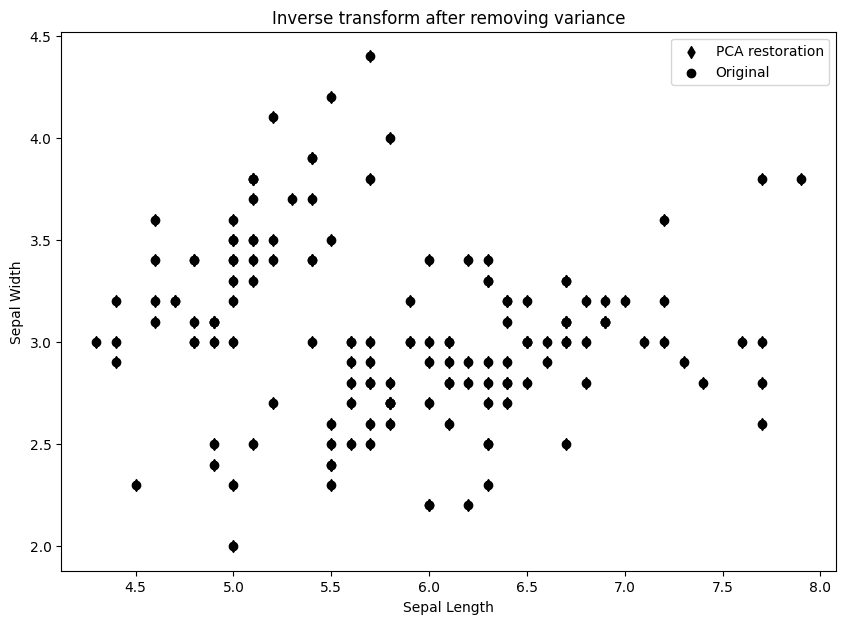

In [73]:
plt.figure(figsize=(10, 7))
plt.scatter(data_restored[:,0], data_restored[:,1], marker='d', label='PCA restoration', c='k');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='o', label='Original', c='k');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');

# Exercise 16: Visualizing Variance Reduction

1. Import the pandas, numpy, and matplotlib plotting libraries and the PCA model from scikit-learn

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

2. Read in the Sepal features from the Iris dataset

In [75]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


3. Use the scitkit-learn API to transform the data on the basis of the first principal component

In [76]:
model = PCA(n_components=1)
data_p = model.fit_transform(df.values)

4. Compute the inverse transform of the reduced data and plot the result to visualize the effect of removing the variance from the data

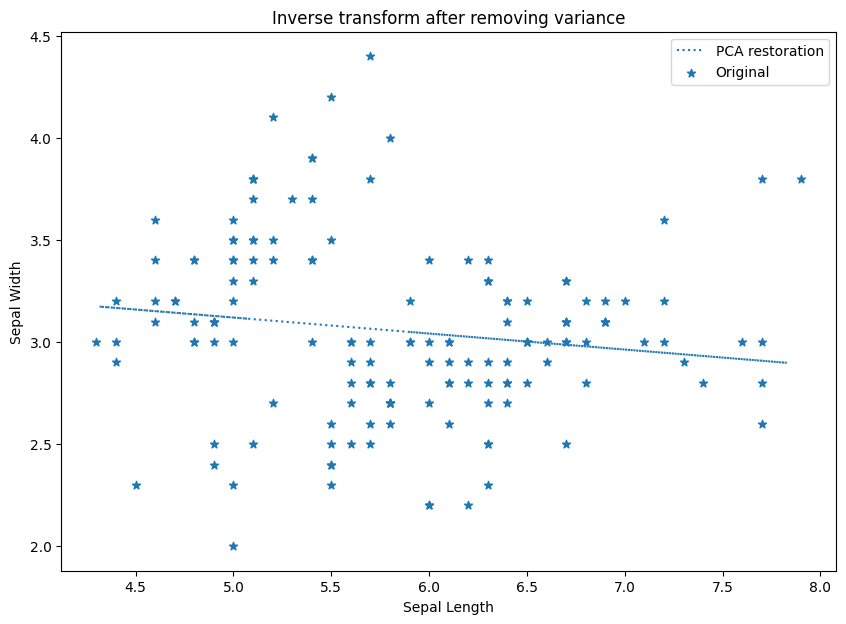

In [77]:
data = model.inverse_transform(data_p);
plt.figure(figsize=(10, 7))
plt.plot(data[:,0], data[:,1], linestyle=':', label='PCA restoration');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='*', label='Original');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');

5. There are only two components of variation in this dataset. If we do not remove any of the components, what will the result of the inverse transform be?

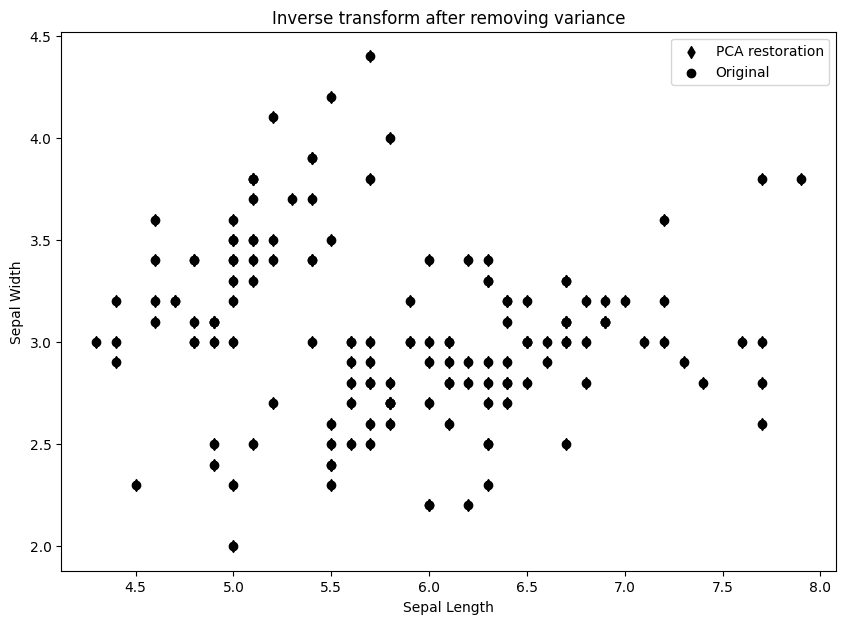

In [78]:
model = PCA()
data_p = model.fit_transform(df.values)
data = model.inverse_transform(data_p);
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], marker='d', label='PCA restoration', c='k');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='o', label='Original', c='k');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');

# Exercise 17: Plotting 3D Plots in Matplotlib

1. Import pandas and matplotlib. To enable 3D plotting, you will also need to import Axes3D.

In [79]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

2. Read in the dataset and select the Sepal Length, Sepal Width, and Petal Width columns

In [80]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width', 'Petal Width']]
df.head()

,Sepal Length,Sepal Width,Petal Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


3. Plot the data in three dimensions and use the projection='3d' argument with the add_subplot method to create the 3D plot

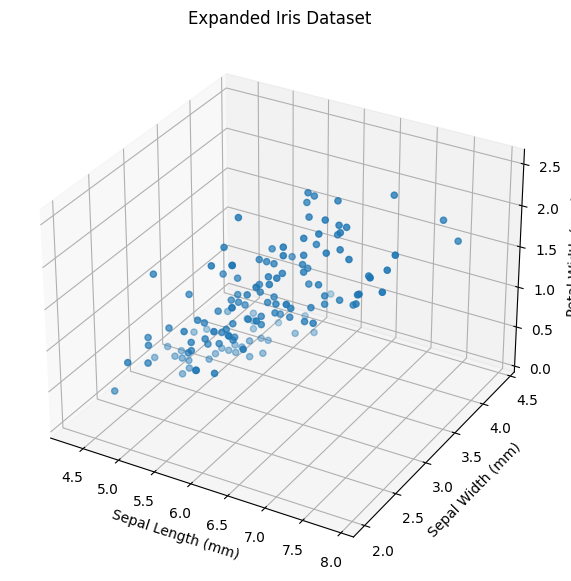

In [81]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required
ax.scatter(df['Sepal Length'], df['Sepal Width'], df['Petal Width']);
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

# Activity 7: PCA Using the Expanded Iris Dataset

1. Import pandas and matplotlib. To enable 3D plotting, you will also need to import Axes3D.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

2. Read in the dataset and select the Sepal Length, Sepal Width, and Petal Width columns.

In [83]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width', 'Petal Width']]
df.head()

,Sepal Length,Sepal Width,Petal Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


3. Plot the data in three dimensions

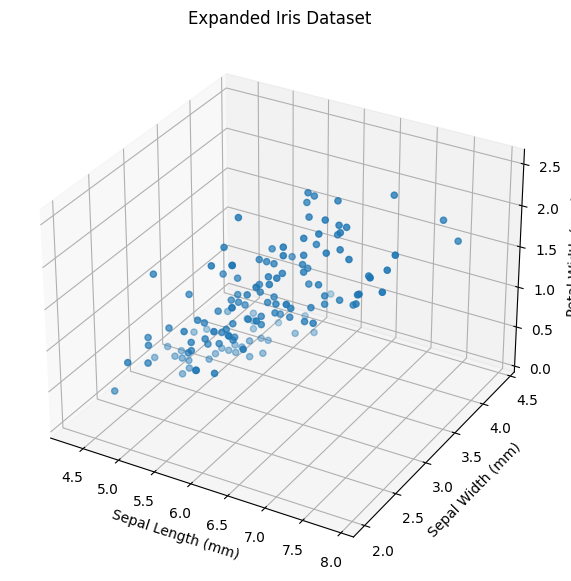

In [84]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Sepal Length'], df['Sepal Width'], df['Petal Width']);
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

4. Create a PCA model without specifying the number of components

In [85]:
model = PCA()

5. Fit the model to the dataset

In [86]:
model.fit(df.values)

PCA()

6. Display the eigenvalues or explained_variance_ratio_

In [87]:
model.explained_variance_ratio_

array([0.8004668 , 0.14652357, 0.05300962])

8. Create a new PCA model, this time specifying the number of components required to keep at least 90% of the variance.

In [88]:
model = PCA(n_components=2)

9. Transform the data using the new model

In [89]:
data_transformed = model.fit_transform(df.values)

10. Plot the transformed data

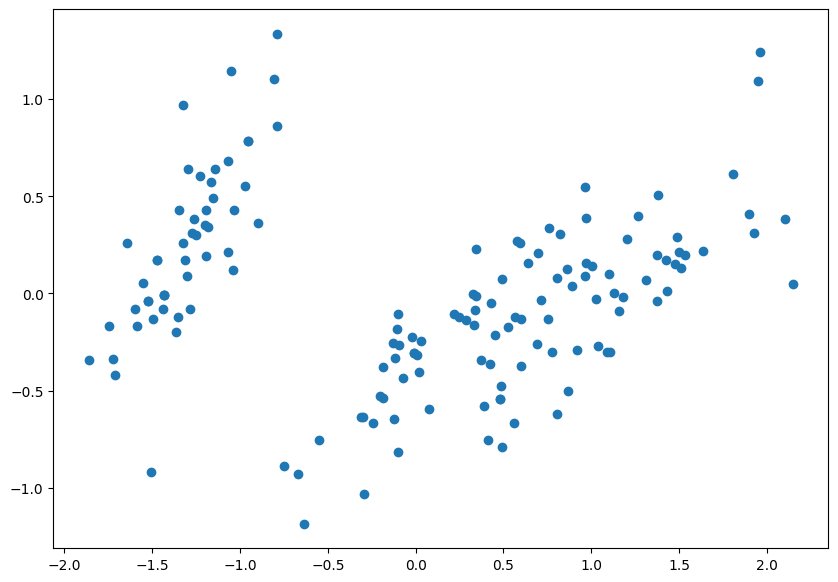

In [90]:
plt.figure(figsize=(10, 7))
plt.scatter(data_transformed[:,0], data_transformed[:,1]);

11. Restore the transformed data to the original dataspace

In [91]:
data_restored = model.inverse_transform(data_transformed)

12. Plot the restored data in three dimensions in one subplot and the original data in a second subplot to visualize the effect of removing some of the variance.

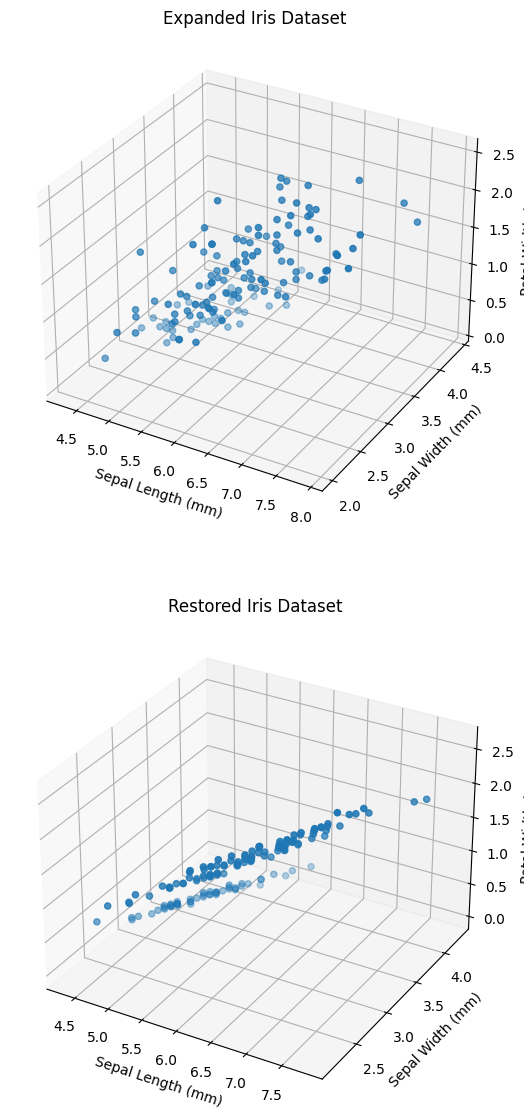

In [92]:
fig = plt.figure(figsize=(10, 14))

# Original Data
ax = fig.add_subplot(211, projection='3d')
ax.scatter(df['Sepal Length'], df['Sepal Width'], df['Petal Width'], label='Original Data');
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Expanded Iris Dataset');

# Transformed Data
ax = fig.add_subplot(212, projection='3d')
ax.scatter(data_restored[:,0], data_restored[:,1], data_restored[:,2], label='Restored Data');
ax.set_xlabel('Sepal Length (mm)');
ax.set_ylabel('Sepal Width (mm)');
ax.set_zlabel('Petal Width (mm)');
ax.set_title('Restored Iris Dataset');